In [1]:
import numpy as np
from math import sin
#from numpy import sin


def gety(f, x):
    try:
        y = f(x)
    except Exception as e:
        print('Exception handling', e)
        n = x.size
        y = np.zeros(n)
        for i in range(n):
            y[i] = f(x[i])
    return y



def tabulate(f, a, b, n):
    x = np.linspace(a, b, n)
    y = gety(f, x)
    return x, y


def fun(x):
    '''sin(x)
    '''
    if x == 0:
        return 1
    else:
        return sin(x)



if __name__ == '__main__':
    n = int(input('n: '))
    a = float(input('a: '))
    b = float(input('b: '))


    funcs = [fun, sin, np.vectorize(sin)]
    for ff in funcs:
        x, y = tabulate(ff, a, b, n)
        if n < 50:
            print('\n', x, '\n', y)
        print('', str(ff)) 

n: 300000
a: -50
b: 50
Exception handling The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()
 <function fun at 0x06FA46A8>
Exception handling only size-1 arrays can be converted to Python scalars
 <built-in function sin>


n: 3000
a: 1
b: 100
Exception handling The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()
Exception handling The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()
Exception handling The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()


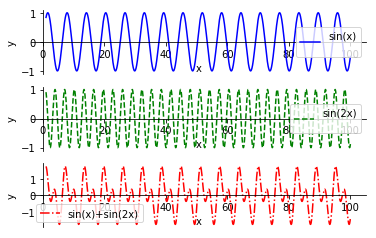

In [3]:
import numpy as np
import matplotlib.pyplot as plt
#from tabulate import *
from math import sin
#from numpy import sin

styles = ['-','--','-.',':','.',',',
          'o','v','^','<','>',
          '1','2','3','4',
          's','p','*','h','H',
          '+','x','D','d','|','_']

colors = ['b','g','r','c','m','y','k','w']

def movespinesticks():
    ax = plt.gca()  
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data',0))
    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_position(('data',0))

    

def plotfunc4(a, b, n, *f):
    tabb = False    
    m = len(f)      
    for i,ff in enumerate(f):
        style = styles[i % len(styles)] + colors[i % len(colors)]
#        style = np.random.choice(styles) + np.random.choice(colors)
        if not tabb:
            x, y = tabulate(ff, a, b, n)    
            plt.subplot(m, 1, 1)            
            tabb = True
        else:
            y = gety(ff, x)                 
            plt.subplot(m, 1, i + 1)        
        movespinesticks()               
        plt.xlabel('x')                 
        plt.ylabel('y')                 
        plt.plot(x, y, style, label = ff.__doc__) 
        plt.legend(loc = 'best')          
    plt.show()                      

def sindivx(x):
    '''sin(2x)
    '''
    if x == 0:
        return 1
    else:
        return sin(2*x)

def plfuncs(x):
    '''sin(x)+sin(2x)'''
    if x==0:
        return 2
    if sin(x)==0 and sin(2*x)==1:
        return 1
    if sin(x)==1 and sin(2*x)==0:
        return 1
    else:
        return sin(x)+sin(2*x)
    


if __name__ == '__main__':
    n = int(input('n: '))
    a = float(input('a: '))
    b = float(input('b: '))


    funcs = [fun, sindivx, plfuncs]
    plotfunc4(a, b, n, *funcs)
